In [2]:
import json
import plotly.graph_objects as go  # type: ignore
import numpy as np

import matplotlib.pyplot as plt

from examples.mixture import Mixture
from examples.nonlinear import NonLinear 
from examples.pricing import Pricing 
from examples.linear import Linear
from examples.cosine import Cosine

## Calculate the landscapes

In [ ]:
Cosine.log_decoupled_landscape(Cosine(seed=0))
Linear.log_decoupled_landscape(Linear(seed=0))
NonLinear.log_decoupled_landscape(NonLinear(seed=0))
Mixture.log_decoupled_landscape(Mixture(seed=2))
Pricing.log_decoupled_landscape(Pricing(d=1, seed=2))

## Visualize the landascapes

In [24]:
experiment_name = 'mixture'
save_dir = f'3D_view/{experiment_name}_final'
if experiment_name == 'cosine':
    experiment = Cosine()
if experiment_name == 'mixture':
    experiment = Mixture()
if experiment_name == 'nonlinear':
    experiment = NonLinear()
if experiment_name == 'pricing':
    experiment = Pricing()
if experiment_name == 'linear':
    experiment = Linear()

with open(f'data/landscape/{experiment_name}.json', 'r') as json_file:
    countour = json.load(json_file)

fig = go.Figure(data=[go.Surface(z=np.array(countour['landscape'][0]).T, x=np.array(countour['x'][0]).squeeze(),
                                 y=np.array(countour['y'][0]).squeeze(), colorscale='ylgnbu_r', showscale=False)])

'''
colors = ['hsl({}, 100%, 50%)'.format(int(360 * i / len(p_p_history))) for i in range(len(p_p_history))]
name = [f'Data points {i}' for i in range(len(p_p_history))]
fig.add_trace(go.Scatter3d(
    x=np.squeeze(np.array(p_p_history)),  # x-coordinates (p_p)
    y=np.squeeze(np.array(p_history)),  # y-coordinates (p)
    z=losses_history,  # z-coordinates (loss values)
    mode='markers',
    marker=dict(
        size=5,
        symbol='circle',
        color=colors,  # Dynamic color progression
    ),
    text=[f'{n}, p_p: {x.item()}, p: {y.item()}, z: {z}' for n, x, y, z in zip(name, p_p_history, p_history, losses_history)],
    hoverinfo='text',
    name="Data point",
))
'''
fig.update_layout(
    # title=experiment_name,
    autosize=True,
    scene=dict(
        zaxis=dict(title='DR(\u03B8<sub>M</sub>,\u03B8<sub>D</sub>)'),
        xaxis=dict(title='\u03B8<sub>D</sub>'),
        yaxis=dict(title='\u03B8<sub>M</sub>'),
    ),
    width=800,
    height=800,
)

fig.update_layout(
    scene_camera=dict(
        up=dict(x=0, y=0, z=1),
        center=dict(x=0, y=0, z=0),
        eye=dict(x=1.75, y=-1.65, z=1.2)
    )
)

fig.show()


## Visualize the performative risk

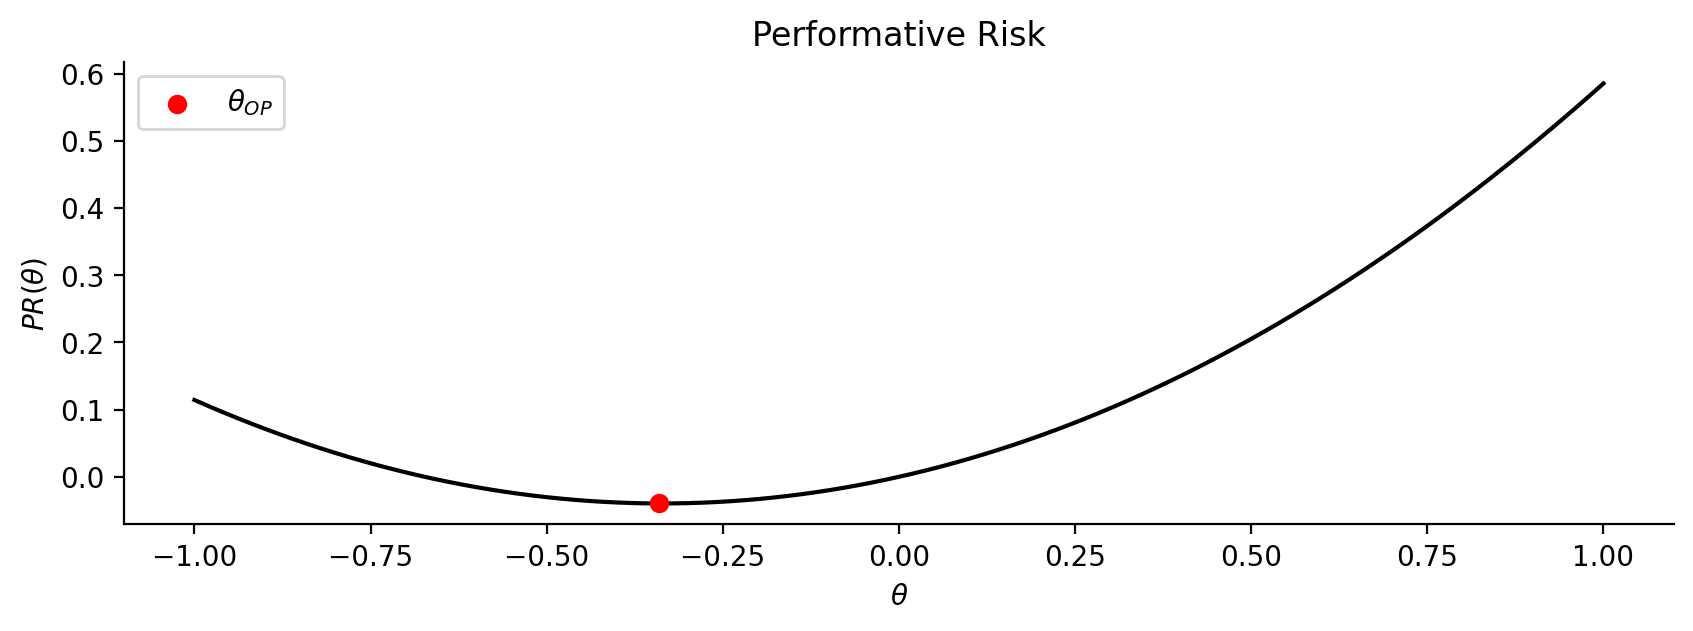

In [25]:
x_data = np.array(countour['x'][0]).squeeze()  # x-axis values
performative_risk = np.array(countour['landscape'][0]).T.diagonal()  # Diagonal values from the landscape matrix
new_x_data = np.arange(x_data[0], x_data[-1], 0.01)
performative_risk = np.interp(new_x_data, x_data, performative_risk)
min_index = np.argmin(performative_risk)
min_value = performative_risk[min_index]
min_x = new_x_data[min_index]


## Add lines for optimal point
fig.add_trace(go.Scatter3d(
    x=np.array(countour['x'][0]),
    y=np.array(countour['y'][0]),
    z=np.array(countour['landscape'][0]).T.diagonal(),
    mode='lines',
    line=dict(color='black', width=4),
    name='x = y Line',
))

fig.update_layout(
    scene_camera=dict(
        up=dict(x=0, y=0, z=1),
        center=dict(x=0, y=0, z=0),
        eye=dict(x=-1.5, y=1.5, z=2)
    )
)

fig.show()

import matplotlib as mpl

mpl.rcParams.update(mpl.rcParamsDefault)

# Initialize the plot
plt.figure(figsize=(10, 3), dpi=200)
# Plot the parameter evolution
plt.plot(new_x_data, performative_risk, color='black')

# Highlight the minimum point
plt.scatter(min_x, min_value, color='red', label=r"$\theta_{OP}$", zorder=5)

plt.xlabel(r"$\theta$")
plt.ylabel(r'$PR(\theta)$')
plt.title(f'Performative Risk')
plt.legend()
plt.grid(False)
plt.gca().spines['top'].set_visible(False)  # Hide top spine
plt.gca().spines['right'].set_visible(False)  # Hide right spine
plt.show()